In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
sun_df = pd.read_csv('sun.csv')

In [ ]:
sun_df.head()

,Unnamed: 0,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking
0,0,4120414C52484D414E44696420493F7C20676574207468...,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking
1,1,414142454C44696420493F7C2067657420746869732072...,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking
2,2,4141424552472042524F4F4B5344696420493F7C206765...,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport
3,3,41414245524744696420493F7C20676574207468697320...,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal
4,4,41414245524744696420493F7C20676574207468697320...,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking


In [ ]:
sun_df.groupby('Ufly_membership_status')['CustomerID'].count()

Ufly_membership_status
Elite            1333
Not member    1267059
Standard       269245
Name: CustomerID, dtype: int64

In [ ]:
new1 = sun_df[sun_df['Ufly_membership_status']=='Elite'].head(2400)
new2 = sun_df[sun_df['Ufly_membership_status']=='Standard'].head(1200)
new2 = sun_df[sun_df['Ufly_membership_status']=='Not member'].head(1200)
new3 = sun_df[sun_df['Card_holder?']=='Yes'].head(2400)
new4 = sun_df[sun_df['Card_holder?']=='No'].head(1200)
new5 = sun_df[sun_df['Preferred_travel_class']=='Coach'].head(1200)
new6 = sun_df[sun_df['Preferred_travel_class']=='First Class'].head(2400)
new7 = sun_df[sun_df['Age_group']=='Young Adults'].head(1200)
new8 = sun_df[sun_df['Age_group']=='Children'].head(1800)
new9 = sun_df[sun_df['Age_group']=='Youth'].head(1800)
new10 = sun_df[sun_df['Age_group']=='Middle Aged'].head(1200)
new11 = sun_df[sun_df['Age_group']=='Senior'].head(1200)
new12 = sun_df[sun_df['Preferred_source-booking']=='SCA Website Booking'].head(400)
new13 = sun_df[sun_df['Preferred_source-booking']=='Outside Booking'].head(400)
new14 = sun_df[sun_df['Preferred_source-booking']=='Airport'].head(1200)
new15 = sun_df[sun_df['Preferred_source-booking']=='Tour Operator Portal'].head(1200)
new16 = sun_df[sun_df['Preferred_source-booking']=='Reservations Booking'].head(1200)
new17 = sun_df[sun_df['Preferred_source-booking']=='No Preference'].head(1200)
new18 = sun_df[sun_df['Preferred_source-booking']=='SY Vacation'].head(1200)

In [ ]:
new_df = pd.concat([new1, new2, new3, new4, new5, new6, new7, new8, new9, new10, new11, new12, new13, new14, new15, \
                   new16, new17, new18])

In [ ]:
new_df.drop_duplicates(inplace=True)

In [ ]:
#new_df['Ufly_membership_status'] = new_df['Ufly_membership_status'].where(new_df['Ufly_membership_status']==2, 'Elite')
#new_df['Ufly_membership_status'] = new_df['Ufly_membership_status'].where(new_df['Ufly_membership_status']=='Elite', 'Standard')

In [ ]:
new_df.count()

Unnamed: 0                  17979
CustomerID                  17979
Gender                      17979
Age_group                   17979
Ufly_membership_status      17979
Card_holder?                17979
Total_trips                 17979
Total_amount_spent          17979
#Discounts                  17979
Preferred_travel_class      17979
#Upgrades                   17979
Preferred_source-booking    17979
dtype: int64

In [ ]:
import gower

In [ ]:
#new_df = sun_df.groupby(['Gender', 'Age_group','Card_holder?', '#Discounts', 'Preferred_travel_class'], group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [ ]:
new_df.groupby('Ufly_membership_status')['CustomerID'].nunique()

Ufly_membership_status
Elite          1293
Not member    11601
Standard       4918
Name: CustomerID, dtype: int64

In [ ]:
#minor cleaning
#new_df[new_df['Ufly_membership_status']==np.nan]
#new_df.head()

In [ ]:
gower_dist = gower.gower_matrix(new_df.iloc[:, 2:])

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
clusterer = KMedoids(n_clusters = 5, random_state = 10, method = 'pam') 
new_df['cluster'] = clusterer.fit_predict(gower_dist)

<AxesSubplot:xlabel='Total_trips', ylabel='#Discounts'>

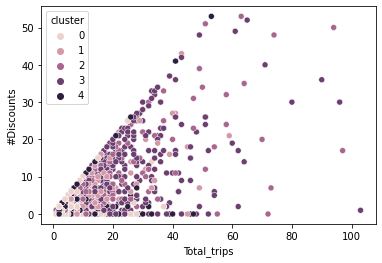

In [ ]:
import seaborn as sns
sns.scatterplot(data=new_df, x = 'Total_trips', y ='#Discounts', hue='cluster')

In [ ]:
# Summary statistics by cluster
print('gender')
print(new_df.groupby('cluster')['Gender'].describe())
print('Age Group')
print(new_df.groupby('cluster')['Age_group'].describe())
print('UflyMemberStatus')
print(new_df.groupby('cluster')['Ufly_membership_status'].describe())
print('CardHolder')
print(new_df.groupby('cluster')['Card_holder?'].describe())
print('NumTrips')
print(new_df.groupby('cluster')['Total_trips'].describe())
print('TotalDocAmt')
print(new_df.groupby('cluster')['Total_amount_spent'].describe())
print('# Discounts')
print(new_df.groupby('cluster')['#Discounts'].describe())
print('Preferred_travel_class')
print(new_df.groupby('cluster')['Preferred_travel_class'].describe())
print('#Upgrades')
print(new_df.groupby('cluster')['#Upgrades'].describe())
print('Preferred_source-booking')
print(new_df.groupby('cluster')['Preferred_source-booking'].describe())

gender
        count unique top  freq
cluster                       
0        5986      2   F  5985
1        2259      1   F  2259
2        1760      1   M  1760
3        2464      2   M  1905
4        5510      1   M  5510
Age Group
        count unique           top  freq
cluster                                 
0        5986      5   Middle Aged  1300
1        2259      5        Senior  1076
2        1760      5        Senior   826
3        2464      5        Senior   951
4        5510      5  Young Adults  1327
UflyMemberStatus
        count unique         top  freq
cluster                               
0        5986      3  Not member  5435
1        2259      3    Standard  2139
2        1760      2    Standard  1570
3        2464      3  Not member  1234
4        5510      3  Not member  4985
CardHolder
        count unique  top  freq
cluster                        
0        5986      2   No  5985
1        2259      2  Yes  1293
2        1760      2  Yes  1297
3        2464     

In [ ]:
from adspy_shared_utilities import plot_labelled_scatter

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score_list =[]
for n_clusters in range(4,6):
   
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters = n_clusters, random_state = 10, method = 'pam') 
    cls_assignment = clusterer.fit_predict(gower_dist)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(gower_dist, cls_assignment)
    silhouette_score_list.append(silhouette_avg)


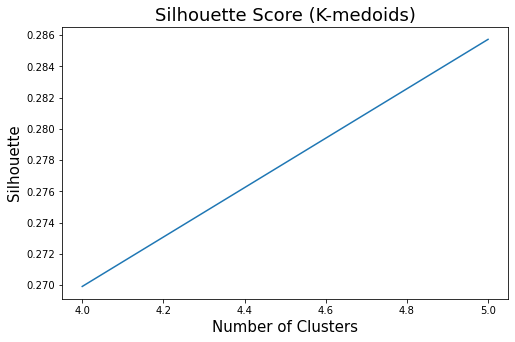

In [ ]:
plt.subplots(figsize=(8,5))
plt.plot(range(4, 6), silhouette_score_list)
plt.title('Silhouette Score (K-medoids)', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Silhouette', fontsize=15)
plt.show()

In [ ]:
clusterer = KMedoids(n_clusters = 10, random_state = 10, method = 'pam') 
new_df['cluster'] = clusterer.fit_predict(gower_dist)

In [ ]:
sns.scatterplot(data=new_df, x = 'Total_trips', y ='Total_amount_spent', hue='cluster')

In [ ]:
new_df.head()

,Unnamed: 0,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,cluster
3198,3198,4142524148414D44696420493F7C206765742074686973...,M,Middle Aged,Elite,No,29,5055.25,9,First Class,20.0,SCA Website Booking,3
3199,3199,4142524148414D44696420493F7C206765742074686973...,M,Middle Aged,Elite,No,2,568.31,1,First Class,0.0,No Preference,3
3200,3200,4142524148414D44696420493F7C206765742074686973...,M,Middle Aged,Elite,No,8,2628.05,4,First Class,2.0,No Preference,3
3202,3202,4142524148414D44696420493F7C206765742074686973...,M,Middle Aged,Elite,No,15,2383.75,2,First Class,9.0,Outside Booking,3
3212,3212,4142524148414D44696420493F7C206765742074686973...,M,Children,Elite,No,9,2605.60,5,First Class,1.0,SCA Website Booking,3


In [ ]:
new_df.groupby('cluster')['CustomerID'].count()*100/17979

cluster
0    33.294399
1    12.564659
2     9.789199
3    13.704878
4    30.646866
Name: CustomerID, dtype: float64

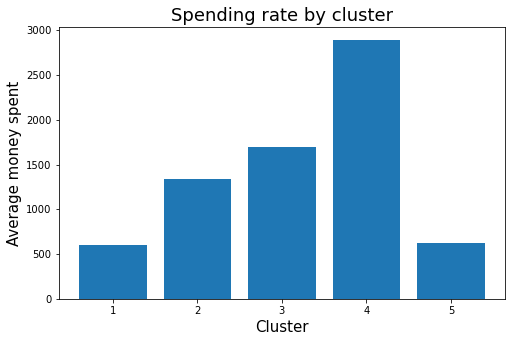

In [ ]:
plt.subplots(figsize=(8,5))
plt.bar([1,2,3,4,5], new_df.groupby('cluster')['Total_amount_spent'].mean())
plt.title('Spending rate by cluster', fontsize=18)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('Average money spent', fontsize=15)
plt.show()

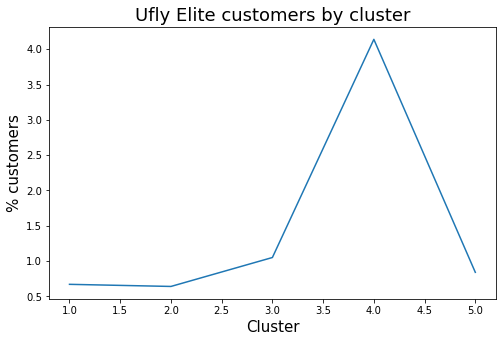

In [ ]:
plt.subplots(figsize=(8,5))
X = [1,2,3,4,5]
plt.plot(X, [0.67, 0.64, 1.05, 4.14, 0.84])
plt.title('Ufly Elite customers by cluster', fontsize=18)
plt.xlabel('Cluster', fontsize=15)
plt.ylabel('% customers', fontsize=15)
plt.show()

In [ ]:
new_df.groupby('cluster')['CustomerID'].count()*100/17979

cluster
0    33.294399
1    12.564659
2     9.789199
3    13.704878
4    30.646866
Name: CustomerID, dtype: float64

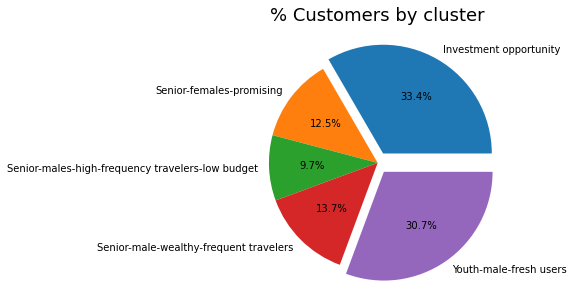

In [ ]:
plt.subplots(figsize=(8,5))
labels = 'Investment opportunity','Senior-females-promising','Senior-males-high-frequency travelers-low budget', \
'Senior-male-wealthy-frequent travelers','Youth-male-fresh users'
sizes = [33.3, 12.5, 9.7, 13.7, 30.6]
explode = (0.1, 0, 0, 0, 0.1)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('% Customers by cluster', fontsize=18)
plt.show()

In [ ]:
# 